In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
data = pd.read_csv("studetsPereformance.csv")

#Top 5 rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Rating
0,female,group B,bachelor's degree,standard,none,72.0,72.0,50.0,Not good
1,female,group C,dsvcsdv,standard,completed,69.0,90.0,88.0,Very good
2,aaaa,group B,master's degree,standard,none,90.0,95.0,93.0,Excellent
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,Acceptance
4,male,group C,some college,standard,none,76.0,78.0,75.0,Good


In [2]:
#data shape
data.shape

(1000, 9)

In [3]:
#data describe
data.describe()

,math score,reading score,writing score
count,999.000000,999.000000,998.000000
mean,66.092092,69.152152,67.921844
std,15.170359,14.597776,15.263710
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
#Checking with null values
data.isnull().sum()

gender                          3
race/ethnicity                  1
parental level of education    10
lunch                           0
test preparation course         6
math score                      1
reading score                   1
writing score                   2
Rating                          4
dtype: int64

In [5]:
#fill null values(I wrote two methods for solving the problem that Two adjacent values are null)
data.fillna(method ='ffill' ,inplace=True)
data.fillna(method ='bfill' ,inplace=True)

#Checking null values again
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Rating                         0
dtype: int64

In [6]:
#remove duplicate rows
data.drop_duplicates(inplace=True)

#Remove irrelevant attributes.
#we will drop race/ethnicity and lunch  attribute becouse it does not affect our study
data = data.drop(['race/ethnicity'] , axis=1) 
data = data.drop(['lunch'] , axis=1)
data

,gender,parental level of education,test preparation course,math score,reading score,writing score,Rating
0,female,bachelor's degree,none,72.0,72.0,50.0,Not good
1,female,dsvcsdv,completed,69.0,90.0,88.0,Very good
2,aaaa,master's degree,none,90.0,95.0,93.0,Excellent
3,male,associate's degree,none,47.0,57.0,44.0,Acceptance
4,male,some college,none,76.0,78.0,75.0,Good
...,...,...,...,...,...,...,...
995,female,master's degree,completed,88.0,99.0,95.0,Excellent
996,male,high school,none,62.0,55.0,55.0,Acceptance
997,female,high school,completed,59.0,71.0,65.0,Not good
998,female,some college,completed,68.0,78.0,77.0,Good


In [7]:
#find Correlation
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817716,0.793447
reading score,0.817716,1.000000,0.946790
writing score,0.793447,0.946790,1.000000


In [8]:
#Remove correlated attributes
data = data.drop(['reading score'] , axis=1) #because it has correlation value greater than 0.8

#ensure correlation
data.corr()

,math score,writing score
math score,1.000000,0.793447
writing score,0.793447,1.000000


In [9]:
data.nunique()

gender                          3
parental level of education     7
test preparation course         4
math score                     81
writing score                  77
Rating                          6
dtype: int64

In [10]:
####  Start remove noise  ####

#remove noise from gender
#check if there is a noise
values = ['female','male']
filter = data['gender'].isin(values)
filter.value_counts()

True     999
False      1
Name: gender, dtype: int64

In [11]:
#remove noise
data = data.drop(index= data[~filter].index)

#ensure that noise is removed
filter = data['gender'].isin(values)
filter.value_counts()

True    999
Name: gender, dtype: int64

In [12]:
#remove noise from parental level of education
#check if there is a noise
values = ['bachelor\'s degree','some college','associate\'s degree','master\'s degree','high school','some high school']
filter = data['parental level of education'].isin(values)
filter.value_counts()

True     998
False      1
Name: parental level of education, dtype: int64

In [13]:
#remove noise
data = data.drop(index= data[~filter].index)

#check if there is a noise
filter = data['parental level of education'].isin(values)
filter.value_counts()

True    998
Name: parental level of education, dtype: int64

In [14]:
#remove noise from test preparation course
#check if there is a noise
values = ['none','completed']
filter = data['test preparation course'].isin(values)
filter.value_counts()

True     996
False      2
Name: test preparation course, dtype: int64

In [15]:
#remove noise by set noise value equal none
data.loc[(~filter), 'test preparation course' ] = 'none'

#check if there is a noise
filter = data['test preparation course'].isin(values)
filter.value_counts()

True    998
Name: test preparation course, dtype: int64

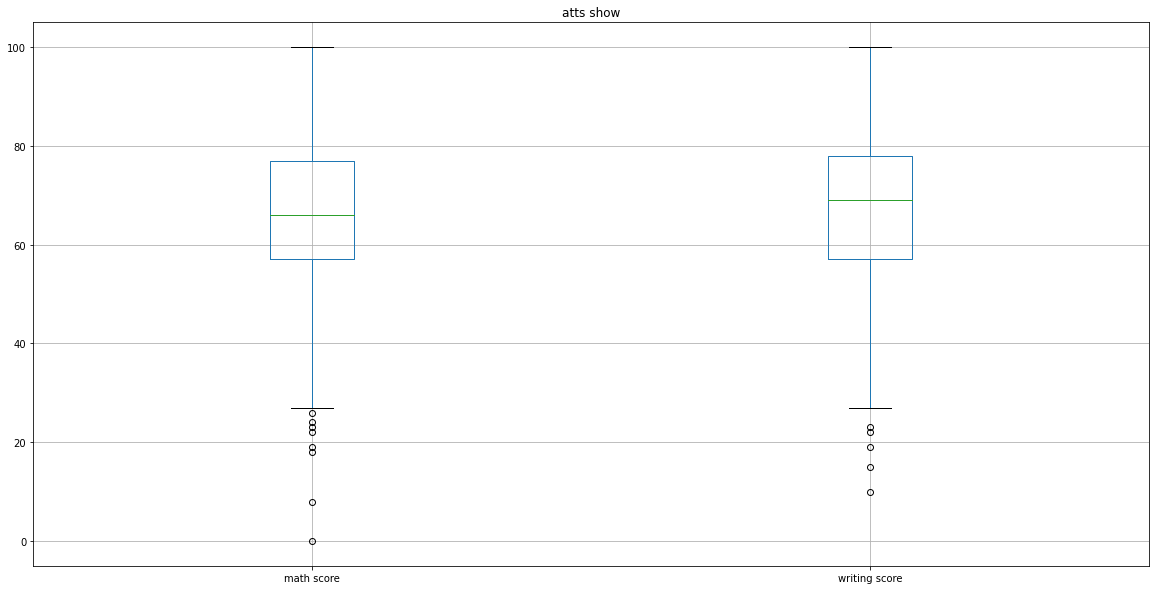

In [16]:
#remove noise from math score and writing score
#check if there is a noise
atts = ["math score", "writing score"]
plt.figure(figsize=(20,10))
data[atts].boxplot()
plt.title("atts show")
plt.show()

In [17]:
#outlier values is under 30, so we'll set it with a value of 30 
filter1 = data['math score'] < 30
filter1.value_counts()

False    984
True      14
Name: math score, dtype: int64

In [18]:
filter2 = data['writing score']<30
filter2.value_counts()

False    989
True       9
Name: writing score, dtype: int64

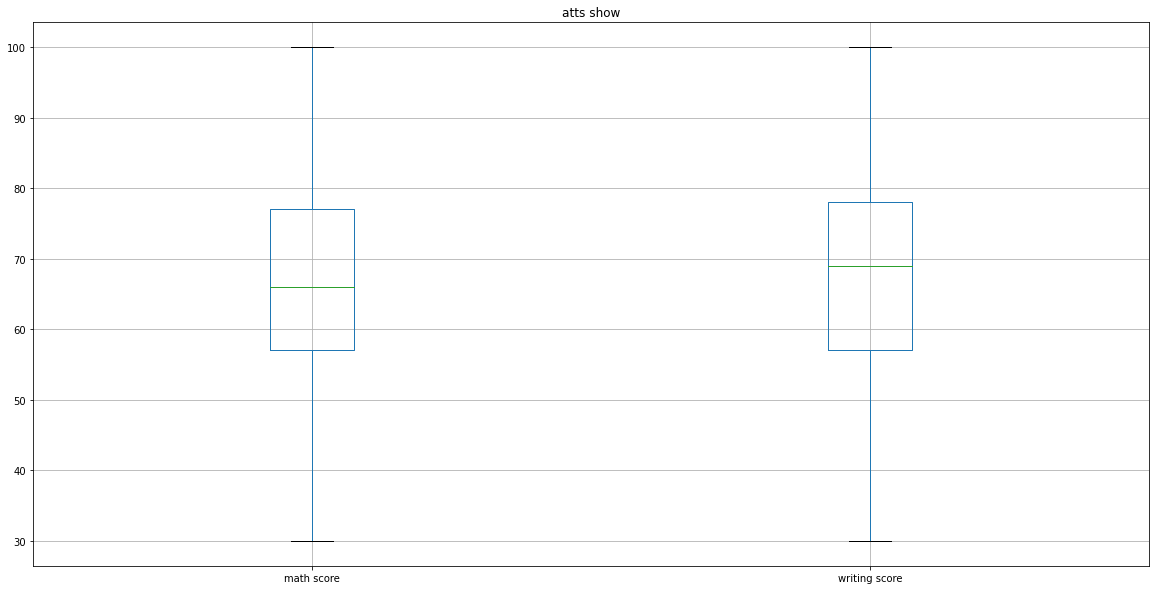

In [19]:
data.loc[(filter1), 'math score'] = 30
data.loc[(filter2), 'writing score'] = 30

#check that we get rid of the noise
atts = ["math score", "writing score"]
plt.figure(figsize=(20,10))
data[atts].boxplot()
plt.title("atts show")
plt.show()

<AxesSubplot:>

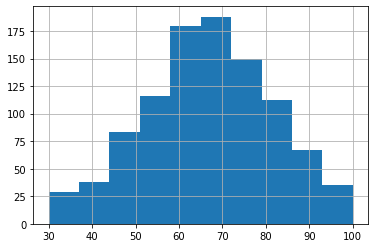

In [20]:
#show math score diagram
data['math score'].hist()

<AxesSubplot:>

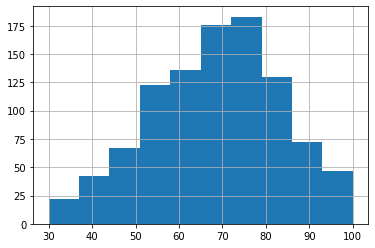

In [21]:
#show writing score diagram
data['writing score'].hist()

In [22]:
#Apply discretization on writing score attribute
bins=[29,39,49,59,69,79,89,100]
cat_labels=[35,45,55, 65, 75, 85, 95]
data['writing score'] = pd.cut(data['writing score'], bins, labels= cat_labels)
data.head()


,gender,parental level of education,test preparation course,math score,writing score,Rating
0,female,bachelor's degree,none,72.0,55,Not good
3,male,associate's degree,none,47.0,45,Acceptance
4,male,some college,none,76.0,75,Good
5,female,associate's degree,none,71.0,75,Good
6,female,some college,completed,88.0,95,Excellent


In [23]:
#Apply discretization on math score attribute
bins=[29,39,49,59,69,79,89,100]
cat_labels=[35,45,55, 65, 75, 85, 95]
data['math score'] = pd.cut(data['math score'], bins, labels= cat_labels)
data.head()

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,female,bachelor's degree,none,75,55,Not good
3,male,associate's degree,none,45,45,Acceptance
4,male,some college,none,75,75,Good
5,female,associate's degree,none,75,75,Good
6,female,some college,completed,85,95,Excellent


<AxesSubplot:>

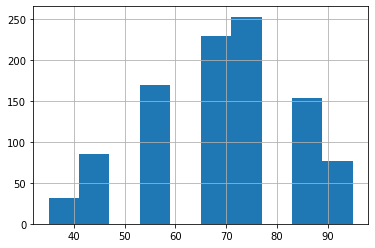

In [24]:
#show writing score diagram
data['writing score'].hist()

<AxesSubplot:>

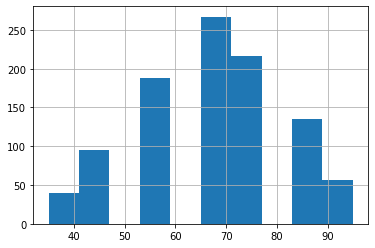

In [25]:
#show math score diagram
data['math score'].hist()

In [26]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split as tt
trainSet, testSet = tt(data, test_size = 0.2)
trainSet.to_csv('trainSet.csv')
testSet.to_csv('testSet.csv')

In [27]:
#Define the same data to set it as numerical values
import copy #to copy data
Dnumerical = copy.copy(data)

In [28]:
#Gender Transformation
Dnumerical.loc[(Dnumerical['gender'] == 'male'), 'gender'] = 1
Dnumerical.loc[(Dnumerical['gender'] == 'female'), 'gender'] = 0
Dnumerical.head()

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,0,bachelor's degree,none,75,55,Not good
3,1,associate's degree,none,45,45,Acceptance
4,1,some college,none,75,75,Good
5,0,associate's degree,none,75,75,Good
6,0,some college,completed,85,95,Excellent


In [29]:
#parental level of education Transformation
Dnumerical.loc[(Dnumerical['parental level of education'] == 'bachelor\'s degree'), 'parental level of education'] = 4
Dnumerical.loc[(Dnumerical['parental level of education'] == 'some college'), 'parental level of education'] = 2
Dnumerical.loc[(Dnumerical['parental level of education'] == 'associate\'s degree'), 'parental level of education'] = 3
Dnumerical.loc[(Dnumerical['parental level of education'] == 'master\'s degree'), 'parental level of education'] = 5
Dnumerical.loc[(Dnumerical['parental level of education'] == 'high school'), 'parental level of education'] = 1
Dnumerical.loc[(Dnumerical['parental level of education'] == 'some high school'), 'parental level of education'] = 0
Dnumerical.head()

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,0,4,none,75,55,Not good
3,1,3,none,45,45,Acceptance
4,1,2,none,75,75,Good
5,0,3,none,75,75,Good
6,0,2,completed,85,95,Excellent


In [30]:
#test preparation course Transformation
Dnumerical.loc[(Dnumerical['test preparation course'] == 'none'), 'test preparation course'] = 0
Dnumerical.loc[(Dnumerical['test preparation course'] == 'completed'), 'test preparation course'] = 1
Dnumerical.head()

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,0,4,0,75,55,Not good
3,1,3,0,45,45,Acceptance
4,1,2,0,75,75,Good
5,0,3,0,75,75,Good
6,0,2,1,85,95,Excellent


In [31]:
#Rating Transformation
Dnumerical.loc[(Dnumerical['Rating'] == 'Fail'), 'Rating'] = 0
Dnumerical.loc[(Dnumerical['Rating'] == 'Acceptance'), 'Rating'] = 1
Dnumerical.loc[(Dnumerical['Rating'] == 'Not good'), 'Rating'] = 2
Dnumerical.loc[(Dnumerical['Rating'] == 'Good'), 'Rating'] = 3
Dnumerical.loc[(Dnumerical['Rating'] == 'Very good'), 'Rating'] = 4
Dnumerical.loc[(Dnumerical['Rating'] == 'Excellent'), 'Rating'] = 5

#convert_dtypes to numeric
Dnumerical["math score"] = pd.to_numeric(Dnumerical["math score"])
Dnumerical["writing score"] = pd.to_numeric(Dnumerical["writing score"])
Dnumerical["Rating"] = Dnumerical["Rating"].astype("category")
Dnumerical.head() #All columns have been converted

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,0,4,0,75,55,2
3,1,3,0,45,45,1
4,1,2,0,75,75,3
5,0,3,0,75,75,3
6,0,2,1,85,95,5


In [32]:
data.head()

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,female,bachelor's degree,none,75,55,Not good
3,male,associate's degree,none,45,45,Acceptance
4,male,some college,none,75,75,Good
5,female,associate's degree,none,75,75,Good
6,female,some college,completed,85,95,Excellent


In [33]:
#Split the Dnumerical into training and testing sets
trainSetNumeric, testSetNumeric = tt(Dnumerical, test_size = 0.2)

#clasification
trainD= trainSetNumeric.drop(['Rating'], axis=1); #train data
trainT= trainSetNumeric.Rating;                   #tarain target
testD= testSetNumeric.drop(['Rating'], axis=1);   #test data
testT= testSetNumeric.Rating;                     #test target

In [34]:
#Make sure that it has been splittted
trainD.head(12)

,gender,parental level of education,test preparation course,math score,writing score
742,0,1,0,85,85
282,0,4,0,75,85
435,1,2,1,55,55
607,0,5,0,45,55
531,0,0,0,45,55
684,1,2,1,65,65
185,1,3,1,65,65
615,0,1,0,65,75
839,0,3,0,65,75
781,0,5,0,75,85


In [35]:
#Make sure that it has been splittted (cont.)
testD.head(12)

,gender,parental level of education,test preparation course,math score,writing score
976,1,2,1,65,65
927,0,1,1,65,75
989,0,2,1,65,85
854,1,0,0,65,55
505,0,0,0,85,85
536,1,3,1,55,55
469,1,2,0,95,75
324,0,1,0,45,45
190,0,3,0,65,65
480,1,1,1,75,65


In [36]:
#Make sure that it has been splittted (cont.)
trainT.head(12)

742    4
282    3
435    1
607    1
531    1
684    2
185    2
615    2
839    3
781    4
624    2
330    2
Name: Rating, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [37]:
#Make sure that it has been splittted (cont.)
testT.head(12)

976    2
927    2
989    3
854    2
505    4
536    1
469    4
324    0
190    2
480    3
584    3
668    3
Name: Rating, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

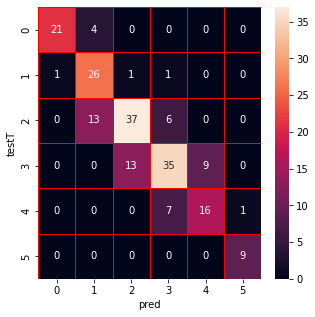

--------------------------------------------------
Test accurecy :  0.72


In [38]:
#classification algorithms

# 1- Apply K-Nearest Neighbors Algorithm

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
import seaborn as sns

#build model
model1= knn(n_neighbors=5)
model1.fit(trainD,trainT)

#predict
pred= model1.predict(testD)

#compare results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testT, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("pred")
plt.ylabel("testT")
plt.show()
print('-'*50)
print ("Test accurecy : ",metrics.accuracy_score(testT,pred))

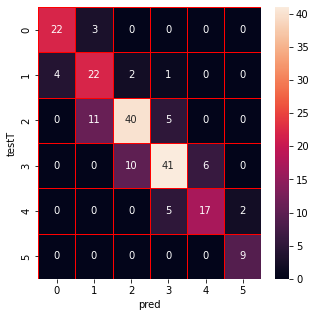

--------------------------------------------------
Test Accuracy: 75.5%


In [39]:
# 2- Apply naive bayes Algorithm

from sklearn.naive_bayes import GaussianNB

#build model
nb = GaussianNB()
nb.fit(trainD,trainT)

#predict
pred = nb.predict(testD)

#compare results
cm = confusion_matrix(testT, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("pred")
plt.ylabel("testT")
plt.show()
print('-'*50)
print("Test Accuracy: {}%".format(round(nb.score(testD,testT)*100,2)))

In [40]:
#clustering algorithms

# 1- KMeans clustering
attributes= Dnumerical.drop(['Rating'], axis=1)
labels = Dnumerical.Rating

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#build model
from sklearn.cluster import KMeans
model= KMeans(n_clusters=5)
model.fit(attributes)

#predict
pred = model.predict(attributes)

#compare results
from sklearn import metrics
contingecyMatrix = metrics.cluster.contingency_matrix(labels, pred)
print (contingecyMatrix)

[[  0   1   0  95   0]
 [  1 114   0  63   2]
 [ 30 183   0   0  40]
 [187   9   0   0  66]
 [ 42   0  88   0  20]
 [  0   0  57   0   0]]


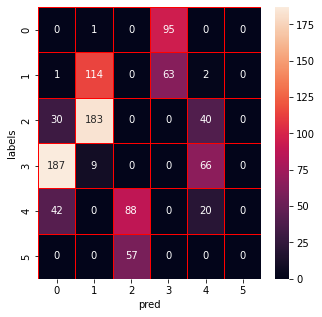

--------------------------------------------------
Test Accuracy: 0.4138868743933318


In [41]:
# To view and compare results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("pred")
plt.ylabel("labels")
plt.show()
ari= metrics.cluster.adjusted_rand_score(labels, pred)
print('-'*50)
print("Test Accuracy:" , ari)

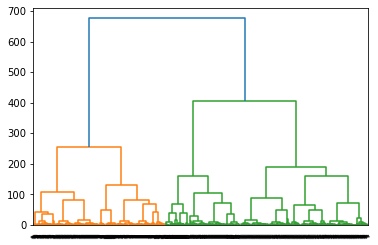

<Figure size 21600x10800 with 0 Axes>

In [42]:
# 2- hieratchy cluster

#import and build hieratchy cluster model
from scipy.cluster.hierarchy import linkage, dendrogram
target_col = Dnumerical["Rating"]
feat = Dnumerical.drop(['Rating'], axis=1)

#Convert them into ndarrays
x = feat.to_numpy(dtype ='float32')
y = target_col.to_numpy()

# Calculate the linkage: mergings
mergings = linkage(x, method = 'ward')

# Plot the dendrogram
dendrogram(mergings, labels = y, leaf_rotation = 120, leaf_font_size = 6)
from matplotlib import pyplot as plt
plt.figure(figsize=(300, 150))
plt.show()

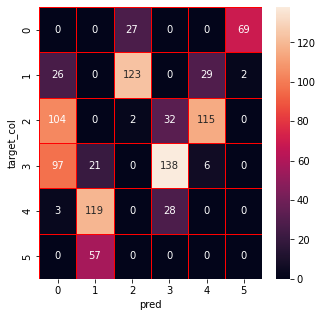

--------------------------------------------------
Test Accuracy: 0.3724011173062733


In [43]:
# Predict and compare results
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
pred=cluster.fit_predict(x)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_col, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("pred")
plt.ylabel("target_col")
plt.show()
ari= metrics.cluster.adjusted_rand_score(target_col, pred)
print('-'*50)
print("Test Accuracy:" , ari)

In [44]:
#Define the same data with nominal values
Dnominal = copy.copy(data)

#writing score and math score Transformation
bins=[29,39,49,59,69,79,89,100]
cat_labels=['G','F','E', 'D', 'C', 'B', 'A']
Dnominal['writing score'] = pd.cut(Dnominal['writing score'], bins, labels= cat_labels)
Dnominal['math score'] = pd.cut(Dnominal['math score'], bins, labels= cat_labels)
Dnominal.head() #All columns have been converted

,gender,parental level of education,test preparation course,math score,writing score,Rating
0,female,bachelor's degree,none,C,E,Not good
3,male,associate's degree,none,F,F,Acceptance
4,male,some college,none,C,C,Good
5,female,associate's degree,none,C,C,Good
6,female,some college,completed,B,A,Excellent


In [45]:
#association_rules

# 1- apriori association_rule algorithm :

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

#deal with Transaction
te = TransactionEncoder()
#transform the Transaction data set to 2D array
te_ary = te.fit(Dnominal).transform(Dnominal) 
print(te_ary)
print('-'*50)
#convert the array into DataFrame
dd = pd.DataFrame(te_ary, columns=te.columns_)
#get the frequent itemset
frequent_itemsets_apriori = apriori(dd, min_support=0.005, use_colnames=True)
#get the association_rules from frequent itemset 
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.2)
print("frequent_itemsets: \n",frequent_itemsets_apriori)
print('-'*50)
print("rules: \n",rules_apriori)

[[False False False ... False False False]
 [ True False  True ...  True  True False]
 [ True False  True ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
--------------------------------------------------
frequent_itemsets: 
    support itemsets
0  0.00501      (e)
1  0.00501      (n)
2  0.00501      (r)
3  0.00501      (t)
4  0.00501   (e, r)
--------------------------------------------------
rules: 
   antecedents consequents  antecedent support  consequent support  support  \
0         (e)         (r)             0.00501             0.00501  0.00501   
1         (r)         (e)             0.00501             0.00501  0.00501   

   confidence   lift  leverage  conviction  
0         1.0  199.6  0.004985         inf  
1         1.0  199.6  0.004985         inf  


--------------------------------------------------


<AxesSubplot:>

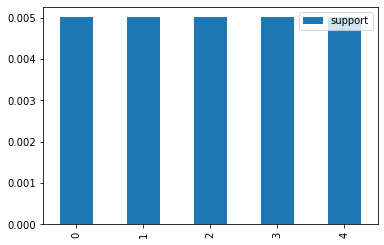

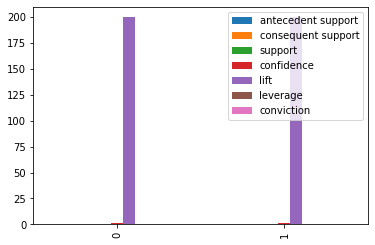

In [46]:
p1 = pd.DataFrame(frequent_itemsets_apriori)
p1.plot(kind="bar")
print('-'*50)
p2 = pd.DataFrame(rules_apriori)
p2.plot(kind="bar")

In [47]:
# 2- fpgrowth association_rule algorithm :

#deal with Transaction
te = TransactionEncoder()
#transform the Transaction data set to 2D array
te_ary = te.fit(Dnominal).transform(Dnominal) 
print(te_ary)
print('-'*50)
#convert the array into DataFrame
dd = pd.DataFrame(te_ary, columns=te.columns_)
#get the frequent itemset
frequent_itemsets_fpgrowth = fpgrowth(dd, min_support=0.005, use_colnames=True)
#get the association_rules from frequent itemset
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.2)
print("frequent_itemsets: \n",frequent_itemsets_fpgrowth)
print('-'*50)
print("rules: \n",rules_fpgrowth)

[[False False False ... False False False]
 [ True False  True ...  True  True False]
 [ True False  True ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
--------------------------------------------------
frequent_itemsets: 
    support itemsets
0  0.00501      (r)
1  0.00501      (n)
2  0.00501      (e)
3  0.00501      (t)
4  0.00501   (e, r)
--------------------------------------------------
rules: 
   antecedents consequents  antecedent support  consequent support  support  \
0         (e)         (r)             0.00501             0.00501  0.00501   
1         (r)         (e)             0.00501             0.00501  0.00501   

   confidence   lift  leverage  conviction  
0         1.0  199.6  0.004985         inf  
1         1.0  199.6  0.004985         inf  


<AxesSubplot:>

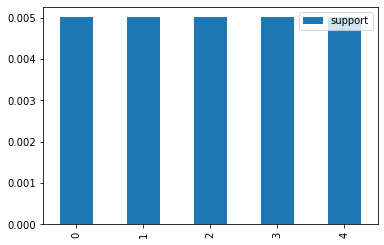

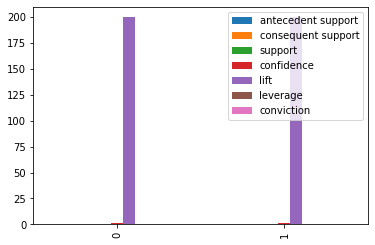

In [48]:
#comparing :
p1 = pd.DataFrame(frequent_itemsets_fpgrowth)
p1.plot(kind="bar")  #run in interactive window to show the diagrame
p2 = pd.DataFrame(rules_fpgrowth)
p2.plot(kind="bar")  #run in interactive window to show the diagrame

In [49]:
# I hope you like it, thank you